# WSI - zadanie 2

Artur Kempiński
325168

Użyta technologia:

python==3.11.6

numpy==1.24.3

matplotlib==3.8.0

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import display, clear_output

# Implementacja

In [113]:
def f1(x1, y1):
    return (x1**2 + y1 - 11)**2 + (x1 + y1**2 - 7)**2

In [114]:
def f2(x2, y2):
    return 2 * x2**2 + 1.05 * x2**4 + x2**6 / 6 + x2 * y2 + y2**2

In [115]:
def fitness_function(individual, min_value=-5, max_value=5, penalty=100):
    x1, y1, x2, y2 = individual
    fitness_value = f1(x1, y1) + f2(x2, y2)
    for gene in individual:
        if gene < min_value or gene > max_value:
            fitness_value += penalty
    return fitness_value

In [116]:
def evaluate_population(population):
    return [fitness_function(individual) for individual in population]

In [117]:
def tournament_selection(population, fitness_values, tournament_size):
    new_population = []
    amount_of_enemies = tournament_size - 1
    for index_of_individual in range(len(population)):
        indexes_of_enemies = random.sample(range(len(population)), amount_of_enemies)
        indexes_of_participants = [index_of_individual] + indexes_of_enemies
        index_of_winner = min(indexes_of_participants, key=lambda index: fitness_values[index])
        winner = population[index_of_winner]
        new_population.append(winner)
        
    return new_population

In [118]:
def crossing(population, crossing_probability):
    new_population = []
    possible_splitting_points = list(range(1, len(population[0])))
    
    for individual in population:
        parent_1 = individual
        is_crossing = random.random() < crossing_probability
        if is_crossing:
            parent_2 = random.choice(population)
            splitting_point = random.choice(possible_splitting_points)
            child = np.concatenate((parent_1[:splitting_point], parent_2[splitting_point:]))
            new_population.append(child)
        else:
            new_population.append(parent_1)
    return new_population

Powyżej założyłem, że gdy zachodzi krzyżowanie, to nie może dojść do sytuacji w której nowym osobnikiem będzie jeden z rodziców w całości

Dla osobników p1 = [x1_1, x2_1, y1_1, y2_1] i p2 = [x1_2, x2_2, y1_2, y2_2] dozwolone "punkty przecięcia" to [1, 2, 3]

Oczywiście zakładam, że rozmiar każdego osobnika populacji jest taki sam

In [119]:
def mutation(population, mutation_probability, mutation_range):
    new_population = []
    
    for individual in population:
        new_individual = []
        
        for gene in individual:
            is_mutation = random.random() < mutation_probability
            if is_mutation:
                mutation_value = np.random.normal(0, mutation_range)
                gene += mutation_value
            new_individual.append(gene)
            
        new_population.append(np.array(new_individual))
        
    return new_population

In [120]:
def evolutionary_algorythm(starting_population, mutation_probability, crossing_probability, mutation_range, amount_of_generations, tournament_size):
    population = starting_population.copy()
    fitness_values = evaluate_population(population)
    for _ in range(amount_of_generations):
        population = tournament_selection(population, fitness_values, tournament_size)
        population = crossing(population, crossing_probability)
        population = mutation(population, mutation_probability, mutation_range)
        fitness_values = evaluate_population(population)
        
    best_individual = population[np.argmin(fitness_values)]
    return best_individual, population

# Poszukiwanie hiperparametrów, które dają stosunkowo dobry wynik

In [121]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

starting_population = np.random.uniform(-5, 5, (population_size, 4))

best_individual, final_population = evolutionary_algorythm(
    starting_population=starting_population,
    mutation_probability=mutation_probability,
    crossing_probability=crossing_probability,
    mutation_range=mutation_range,
    amount_of_generations=amount_of_generations,
    tournament_size=tournament_size
)

print("Best individual: ", best_individual)
print("Fitness value: ", fitness_function(best_individual))

Best individual:  [ 3.58511590e+00 -1.84734193e+00 -1.45226392e-03 -1.28986031e-02]
Fitness value:  0.00022686707051414127


Po kilkunastu próbach udało się otrzymać w miare zadowalające hiperparametry

Dla obu funkcji wartość minimim = 0, więc ich suma także jest równa 0

Poniżej analiza wpływu poszczególnych hiperparametrów na znalezione minimum

# Wpływ rodzaju dystrybucji populacji początkowej

In [122]:
def draw_plot_starting_population_impact(best_individuals, title):
    for i in range(len(best_individuals)):
        fitness_value = fitness_function(best_individuals[i])
        plt.scatter(i, fitness_value)
    plt.xlabel("Number of try")
    plt.ylabel("Fitness value")
    plt.title(title)
    plt.show()

In [123]:
def generate_custom_population(x1_cent, y1_cent, x2_cent, y2_cent, size):
    population = []
    for _ in range(size):
        x1 = np.random.normal(x1_cent, 0.1)
        y1 = np.random.normal(y1_cent, 0.1)
        x2 = np.random.normal(x2_cent, 0.1)
        y2 = np.random.normal(y2_cent, 0.1)
        population.append([x1, y1, x2, y2])
    return population

Average fitness value for uniform distribution:  0.0013730264612513894
Average fitness value for custom distribution:  0.0017076651320066306


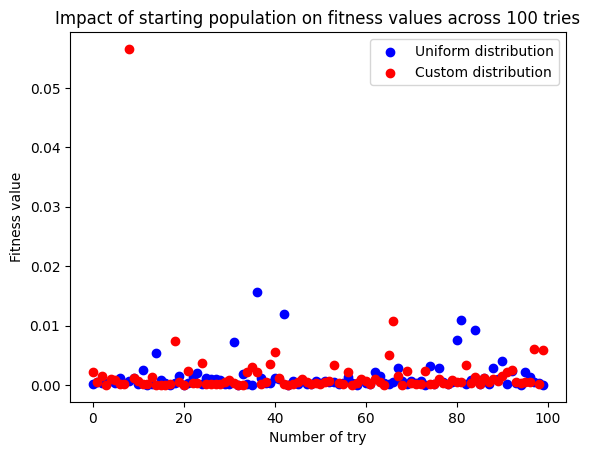

In [124]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

starting_population_uniform = np.random.uniform(-5, 5, (population_size, 4))
starting_population_custom = generate_custom_population(-0.3, -0.9, 0, 0, population_size)

found_best_individuals_uniform = []
found_best_individuals_custom = []

for _ in range(100):
    best_individual_uniform, _ = evolutionary_algorythm(
            starting_population=starting_population_uniform,
            mutation_probability=mutation_probability,
            crossing_probability=crossing_probability,
            mutation_range=mutation_range,
            amount_of_generations=amount_of_generations,
            tournament_size=tournament_size
    )
    found_best_individuals_uniform.append(best_individual_uniform)
    
for _ in range(100):
    best_individual_custom, _ = evolutionary_algorythm(
            starting_population=starting_population_custom,
            mutation_probability=mutation_probability,
            crossing_probability=crossing_probability,
            mutation_range=mutation_range,
            amount_of_generations=amount_of_generations,
            tournament_size=tournament_size
    )
    found_best_individuals_custom.append(best_individual_custom)
    

print("Average fitness value for uniform distribution: ", np.mean([fitness_function(individual) for individual in found_best_individuals_uniform]))
print("Average fitness value for custom distribution: ", np.mean([fitness_function(individual) for individual in found_best_individuals_custom]))

fitness_values_uniform = [fitness_function(individual) for individual in found_best_individuals_uniform]
fitness_values_custom = [fitness_function(individual) for individual in found_best_individuals_custom]

plt.scatter(range(len(found_best_individuals_uniform)), fitness_values_uniform, color='blue', label='Uniform distribution')
plt.scatter(range(len(found_best_individuals_custom)), fitness_values_custom, color='red', label='Custom distribution')
plt.xlabel("Number of try")
plt.ylabel("Fitness value")
plt.title("Impact of starting population on fitness values across 100 tries")
plt.legend()
plt.show()
    

Proponowana w poleceniu dystrybucja populacji początkowej daje minimalnie lepsze rezultaty niż rozkład jednorodny

In [125]:
def evolutionary_algorythm_with_population_history(starting_population, mutation_probability, crossing_probability, mutation_range, amount_of_generations, tournament_size):
    population = starting_population.copy()
    fitness_values = evaluate_population(population)
    population_history = [population]
    for _ in range(amount_of_generations):
        population = tournament_selection(population, fitness_values, tournament_size)
        population = crossing(population, crossing_probability)
        population = mutation(population, mutation_probability, mutation_range)
        fitness_values = evaluate_population(population)
        population_history.append(population)
        
    best_individual = population[np.argmin(fitness_values)]
    return best_individual, population_history

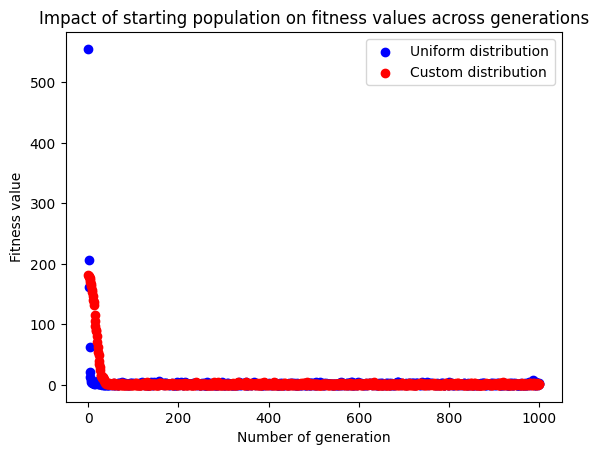

In [126]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

starting_population_uniform = np.random.uniform(-5, 5, (population_size, 4))
starting_population_custom = generate_custom_population(-0.3, -0.9, 0, 0, population_size)


best_individual_uniform, population_history_uniform = evolutionary_algorythm_with_population_history(
        starting_population=starting_population_uniform,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
)
    

best_individual_custom, population_history_custom = evolutionary_algorythm_with_population_history(
        starting_population=starting_population_custom,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
)
    

fitness_values_history_uniform = [evaluate_population(population) for population in population_history_uniform]
fitness_values_history_custom = [evaluate_population(population) for population in population_history_custom]

average_fitness_values_in_generations_uniform = [np.mean(fitness_values) for fitness_values in fitness_values_history_uniform]
average_fitness_values_in_generations_custom = [np.mean(fitness_values) for fitness_values in fitness_values_history_custom]


plt.scatter(range(len(average_fitness_values_in_generations_uniform)), average_fitness_values_in_generations_uniform, color='blue', label='Uniform distribution')
plt.scatter(range(len(average_fitness_values_in_generations_custom)), average_fitness_values_in_generations_custom, color='red', label='Custom distribution')
plt.xlabel("Number of generation")
plt.ylabel("Fitness value")
plt.title("Impact of starting population on fitness values across generations")
plt.legend()
plt.show()
    

Średnia wartość dopasowania populacji na początku jest niższa dla rozkładu w pobliżu maksimum funkcji, jednakże rozkład jednorodny powoduje szybsze osiągnięcie niskiej średniej wartości dopasowania populacji

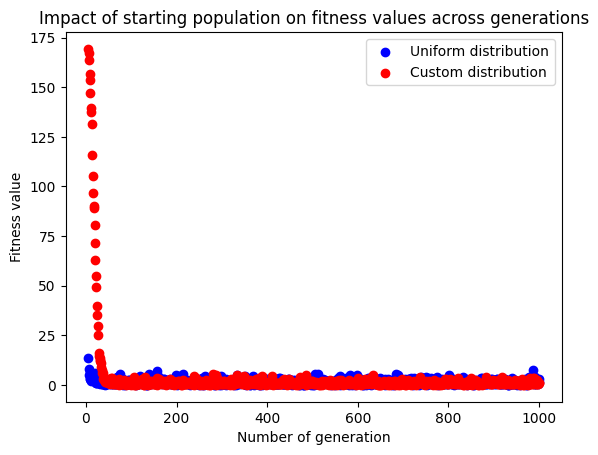

In [127]:
plt.scatter(range(5, len(average_fitness_values_in_generations_uniform)), average_fitness_values_in_generations_uniform[5:], color='blue', label='Uniform distribution')
plt.scatter(range(5, len(average_fitness_values_in_generations_custom)), average_fitness_values_in_generations_custom[5:], color='red', label='Custom distribution')
plt.xlabel("Number of generation")
plt.ylabel("Fitness value")
plt.title("Impact of starting population on fitness values across generations")
plt.legend()
plt.show()

Przybliżenie wykresu poprzez ucięcie pierwszych 5 prób

# Wpływ prawdopodobieństwa mutacji

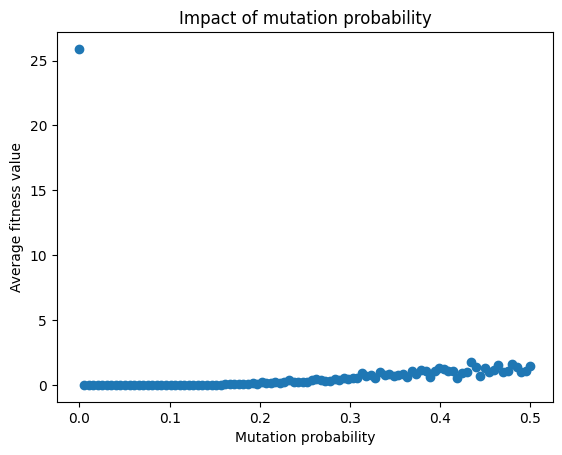

In [129]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
crossing_probability = 0.8
mutation_range = 0.4

mutation_probabilities = np.linspace(0, 0.5, 100)

starting_population = np.random.uniform(-5, 5, (population_size, 4))

average_fitness_values = []

for mutation_probability in mutation_probabilities:
    found_best_individuals = []
    for _ in range(10):
        
        best_individual, _ = evolutionary_algorythm(
            starting_population=starting_population,
            mutation_probability=mutation_probability,
            crossing_probability=crossing_probability,
            mutation_range=mutation_range,
            amount_of_generations=amount_of_generations,
            tournament_size=tournament_size
    )
        
        found_best_individuals.append(best_individual)
        
    fitness_values = [fitness_function(individual) for individual in found_best_individuals]
    average_fitness_values.append(np.mean(fitness_values))
    

plt.scatter(mutation_probabilities, average_fitness_values)
plt.xlabel("Mutation probability")
plt.ylabel("Average fitness value")
plt.title("Impact of mutation probability")
plt.show()

Co ciekawe, prawdopodobieństwo mutacji równe lub bliskie zeru znacząco oddala nas od znalezienia minimum

Poza tym, prawdopodobieństwo mutacji o wartościach w zakresie ok. 0 < p < 0.15 wydaje się dawać najlepsze rezultaty

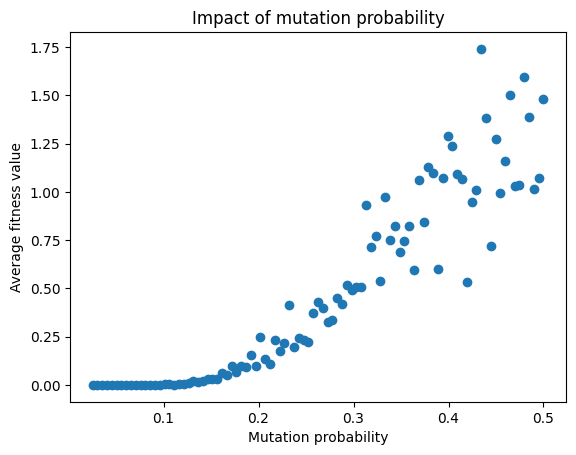

In [130]:
plt.scatter(mutation_probabilities[5:], average_fitness_values[5:])
plt.xlabel("Mutation probability")
plt.ylabel("Average fitness value")
plt.title("Impact of mutation probability")
plt.show()

Ponownie przybliżam wykres ucinając początkowe wartości

# Wpływ prawdopodobieństwa krzyżowania

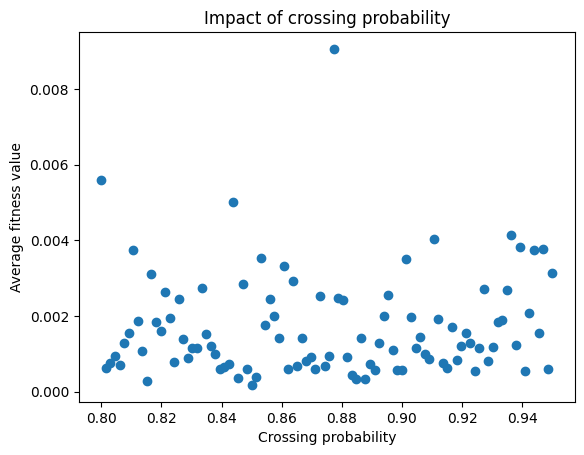

In [131]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
mutation_range = 0.4

starting_population = np.random.uniform(-5, 5, (population_size, 4))

crossing_probabilities = np.linspace(0.8, 0.95, 100)

average_fitness_values = []

for crossing_probability in crossing_probabilities:
    found_best_individuals = []
    for _ in range(10):
        
        best_individual, _ = evolutionary_algorythm(
            starting_population=starting_population,
            mutation_probability=mutation_probability,
            crossing_probability=crossing_probability,
            mutation_range=mutation_range,
            amount_of_generations=amount_of_generations,
            tournament_size=tournament_size
    )
        
        found_best_individuals.append(best_individual)
        
    fitness_values = [fitness_function(individual) for individual in found_best_individuals]
    average_fitness_values.append(np.mean(fitness_values))

plt.scatter(crossing_probabilities, average_fitness_values)
plt.xlabel("Crossing probability")
plt.ylabel("Average fitness value")
plt.title("Impact of crossing probability")
plt.show()

Dobór prawdopodobieństwa krzyżowania w zadanym zakresie wydaje się nie mieć większego wpływu na wartości znalezionych minimów

# Rysowanie poszczególnych etapów algorytmu ewolucyjnego

In [132]:
def draw_population(population, title, sleep_time=0.05):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
    x_domain = np.linspace(-5, 5, 100)
    y_domain = np.linspace(-5, 5, 100)
    
    x_domain, y_domain = np.meshgrid(x_domain, y_domain)
    
    z1 = [f1(x, y) for x, y in zip(x_domain, y_domain)]
    z2 = [f2(x, y) for x, y in zip(x_domain, y_domain)]
    
    ax1.contour(x_domain, y_domain, z1, 60, cmap='viridis')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('f1(x, y)')

    ax2.contour(x_domain, y_domain, z2, 60, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('f2(x, y)')
    
    f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]
    f2_mins = [(0, 0)]
    
    ax1.plot([x for x, _ in f1_mins], [y for _, y in f1_mins], 'g*', markersize=12, label='Minimum')
    ax2.plot([x for x, _ in f2_mins], [y for _, y in f2_mins], 'g*', markersize=12, label='Minimum')
    
    for individual in population:
        x1, y1, x2, y2 = individual
        ax1.scatter(x1, y1, color='red')
        ax2.scatter(x2, y2, color='red')

    ax1.legend()
    ax2.legend()

    plt.tight_layout()
    
    plt.suptitle(title, fontsize=16)
    
    display(fig)
    time.sleep(sleep_time)
    clear_output(wait=True)
    plt.close(fig)

Przybliżone minima funkcji f1 i f2 z WolframAlpha

In [133]:
def evolutionary_algorythm_with_plots(starting_population, mutation_probability, crossing_probability, mutation_range, amount_of_generations, tournament_size, plot_frequency=10):
    population = starting_population.copy()
    fitness_values = evaluate_population(population)
    
    draw_population(population, "Starting population")
    
    for generation_number in range(amount_of_generations):
        is_plot_generation = generation_number % plot_frequency == 0
        
        population = tournament_selection(population, fitness_values, tournament_size)
        
        if is_plot_generation:
            draw_population(population, f"Gen: {generation_number} - After tournament")
        
        population = crossing(population, crossing_probability)
        
        if is_plot_generation:
            draw_population(population, f"Gen: {generation_number} - After crossing")
        
        population = mutation(population, mutation_probability, mutation_range)
        
        if is_plot_generation:
            draw_population(population, f"Gen: {generation_number} - After mutation")
        
        fitness_values = evaluate_population(population)
        
    best_individual = population[np.argmin(fitness_values)]
    
    draw_population(population, "Final population")
    
    return best_individual, population

Rysowanie dla jednorodnej początkowej dystrybucji:

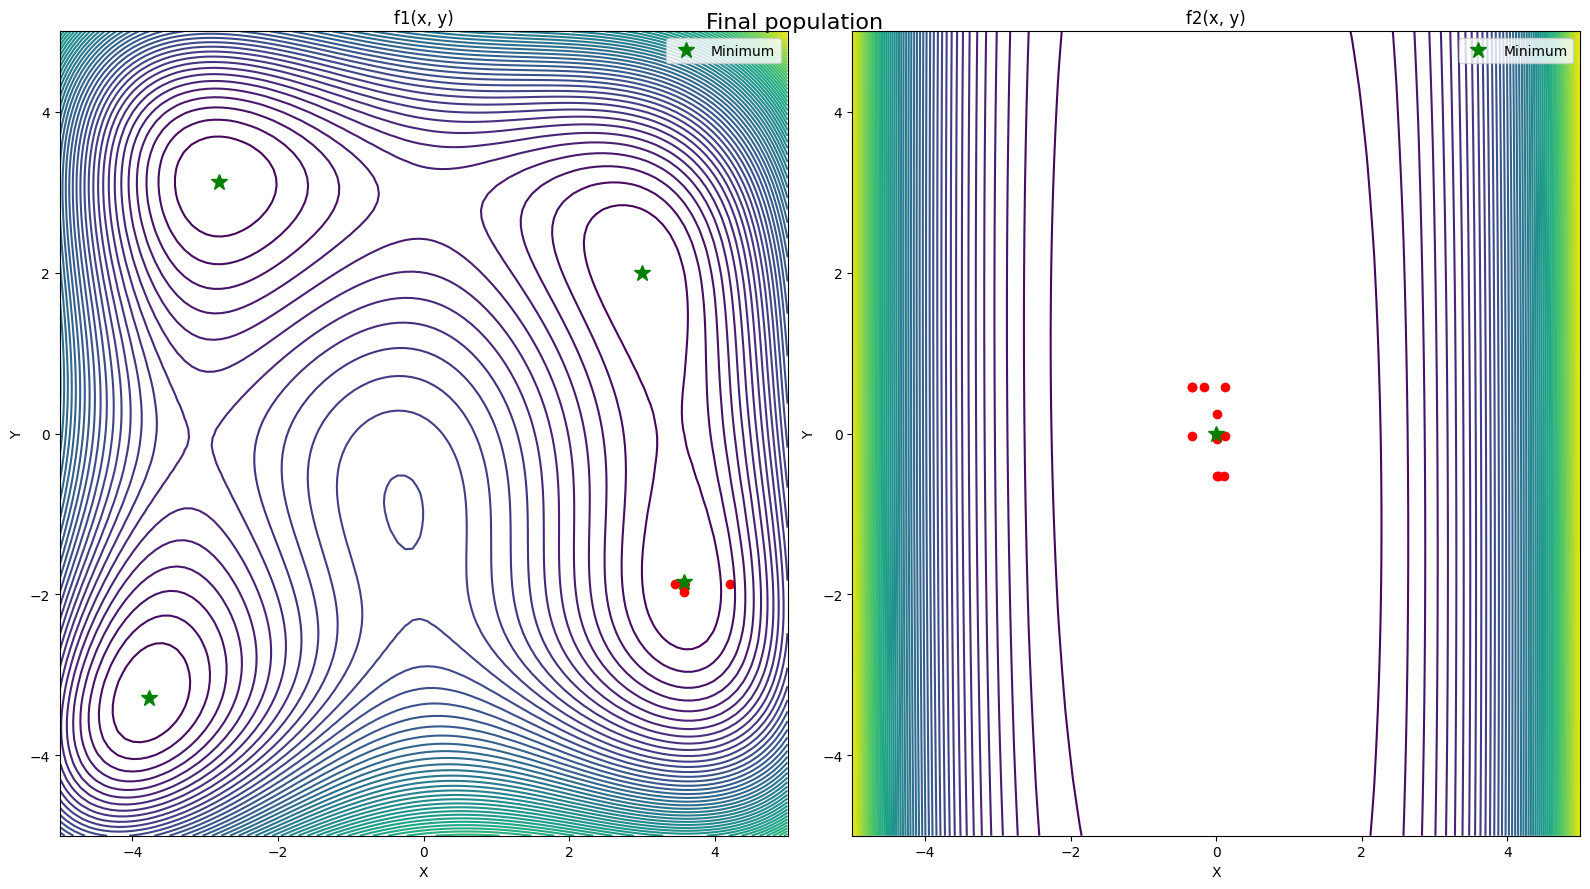

In [134]:
population_size = 20
amount_of_generations = 100
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

plot_frequency = 5

starting_population = np.random.uniform(-5, 5, (population_size, 4))

best_individual, final_population = evolutionary_algorythm_with_plots(
    starting_population=starting_population,
    mutation_probability=mutation_probability,
    crossing_probability=crossing_probability,
    mutation_range=mutation_range,
    amount_of_generations=amount_of_generations,
    tournament_size=tournament_size,
    plot_frequency=plot_frequency
)


Rysowanie dla zadanej w poleceniu początkowej dystrybucji

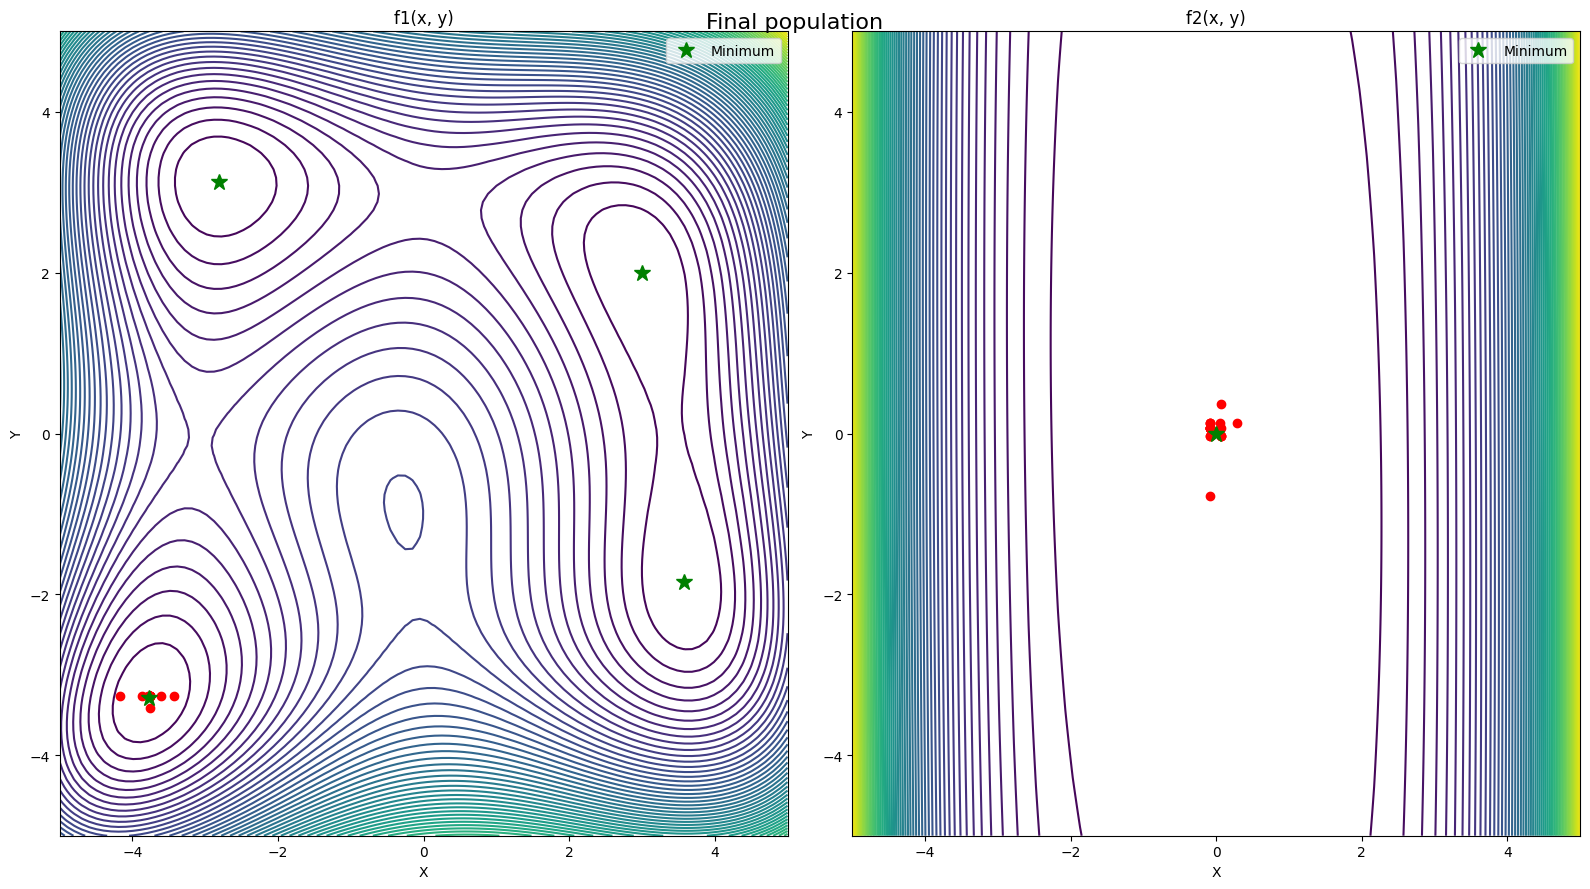

In [135]:
population_size = 20
amount_of_generations = 100
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

plot_frequency = 5

starting_population = generate_custom_population(-0.3, -0.9, 0, 0, population_size)

best_individual, final_population = evolutionary_algorythm_with_plots(
    starting_population=starting_population,
    mutation_probability=mutation_probability,
    crossing_probability=crossing_probability,
    mutation_range=mutation_range,
    amount_of_generations=amount_of_generations,
    tournament_size=tournament_size,
    plot_frequency=plot_frequency
)


Jak można zauważyć, rozkład początkowy proponowany w poleceniu ustawia większość populacji w maksimum funkcji f1 i minimum funckji f2

Potencjalny wpływ tego rozkładu na znajdowane minima będzie analizowany w dalszej części

# Analiza rozkładu końcowych populacji między minimami f1

In [136]:
def distance_2d(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [137]:
def is_in_radius(point, center, radius):
    return distance_2d(point, center) <= radius

In [138]:
def match_points_to_mins(points, f_mins, radius):
    min_to_individuals = {f_min: [] for f_min in f_mins}
    min_to_individuals['other'] = []

    for point in points:
        is_point_matched = False
        
        for f_min in f_mins:
            if is_in_radius(point, f_min, radius):
                min_to_individuals[f_min].append(point)
                is_point_matched = True
                break
            
        if not is_point_matched:
            min_to_individuals['other'].append(point)
    
    return min_to_individuals

Korzystanie z instrukcji break sprawia, że jeżeli punkt znajduje się w obrębie więcej niż jednego minima, zostanie przypisany tylko do jednego z nich. Nie będzie to problemem dla wystarczająco małego zadanego promienia, a znacząco zmniejszy ilość niepotrzebnych sprawdzeń i przyspieszy skrypt

In [139]:
f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]

distances = []

for f_min_1 in f1_mins:
    for f_min_2 in f1_mins:
        if f_min_1 != f_min_2:
            distances.append(distance_2d(f_min_1, f_min_2))
            
print("Min distance between f1 mins: ", min(distances))

Min distance between f1 mins:  3.892256790321009


Powyżej skrypt liczący najmniejszy dystans między dwoma minimami f1.

Upewniam się, że wybrany przeze mnie następnie promień służący do przypisywania osobników do minimów nie będzie sprawiał problemu opisanego punkt wyżej

In [140]:
def draw_plot_individuals_amount_to_min(min_to_individuals, title):
    f_mins = list(min_to_individuals.keys())
    amounts_of_points = [len(min_to_individuals[f_min]) for f_min in f_mins]
    plt.bar(range(len(amounts_of_points)), amounts_of_points)
    plt.xticks(range(len(min_to_individuals)), [str(f_min) for f_min in f_mins], rotation=45)
    plt.xlabel("Min")
    plt.ylabel("Amount of individuals")
    plt.title(title)
    plt.show()

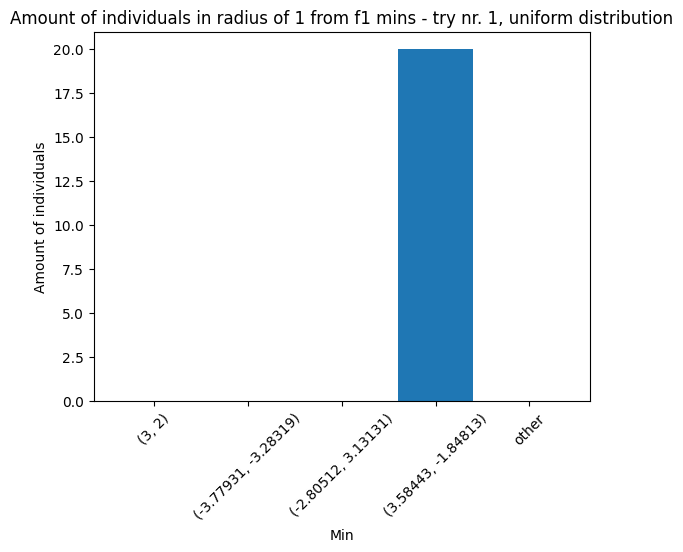

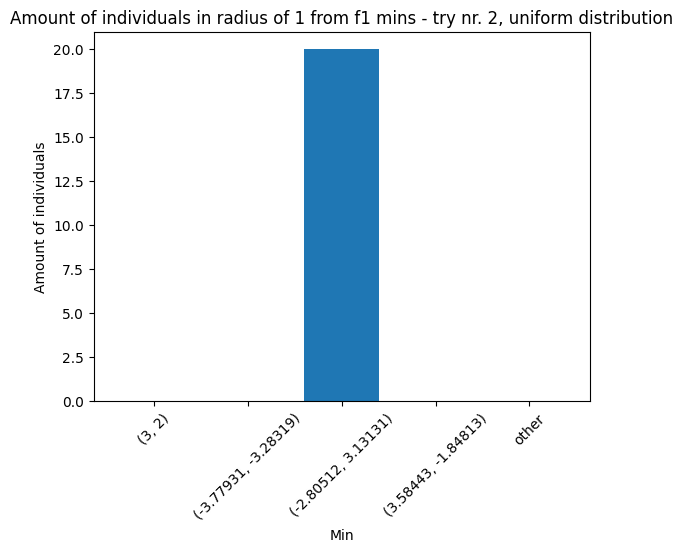

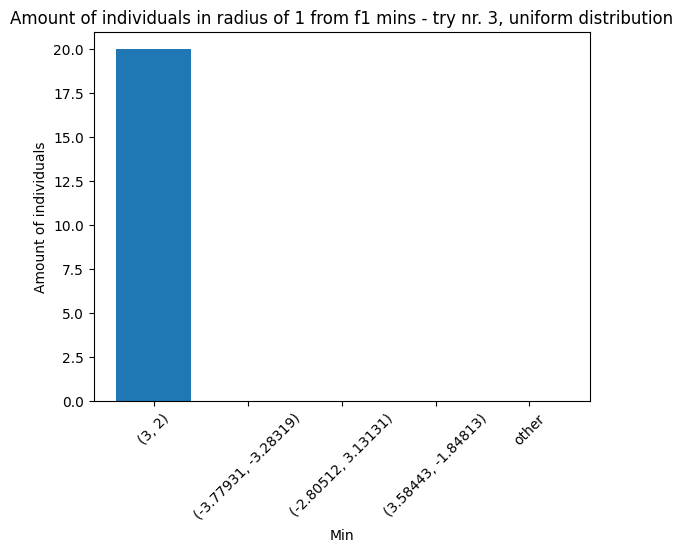

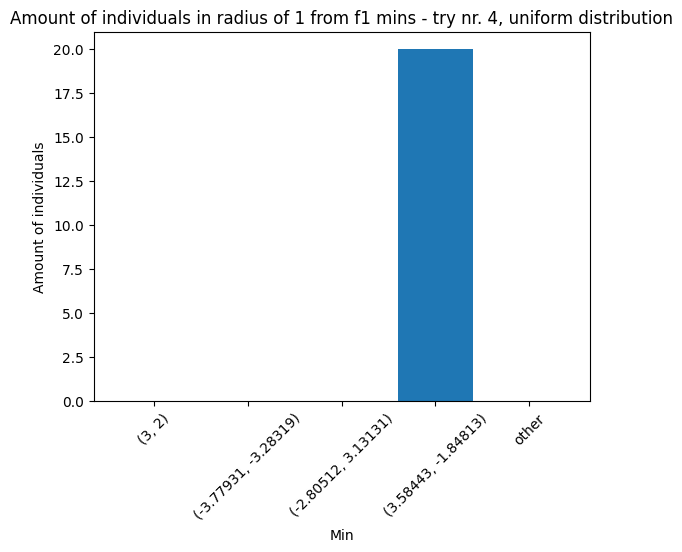

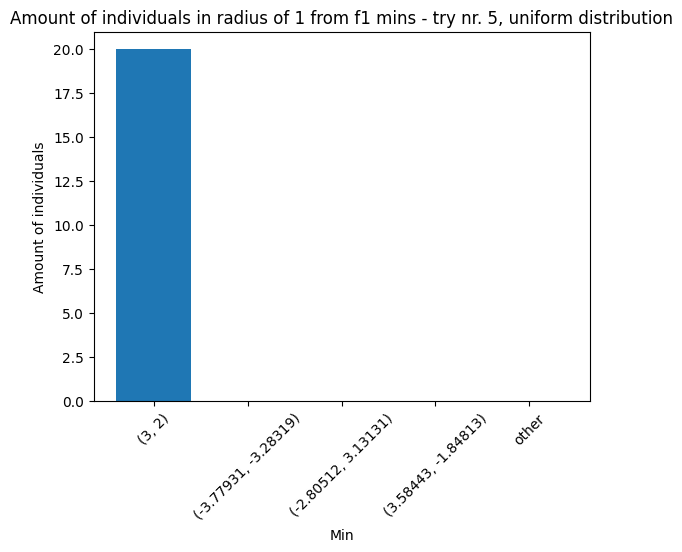

In [151]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]
radius = 1

for number_of_try in range(1, 6):
    starting_population = np.random.uniform(-5, 5, (population_size, 4))
    _, population = evolutionary_algorythm(
        starting_population=starting_population,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
    )

    f1_points = [(x1, y1) for x1, y1, _, _ in population]
    
    min_to_individuals = match_points_to_mins(f1_points, f1_mins, radius)

    title = f"Amount of individuals in radius of 1 from f1 mins - try nr. {number_of_try}, uniform distribution"
    draw_plot_individuals_amount_to_min(min_to_individuals, title)

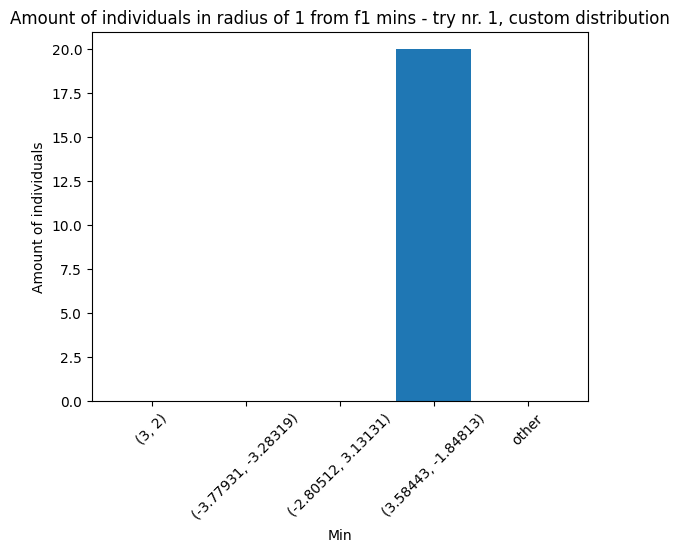

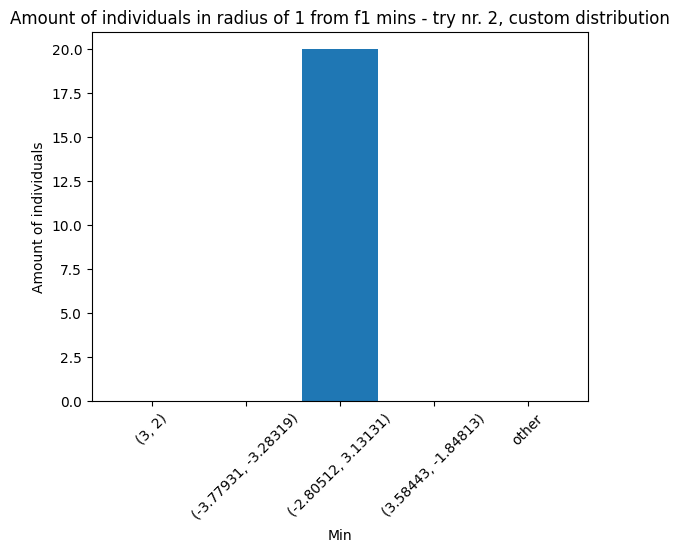

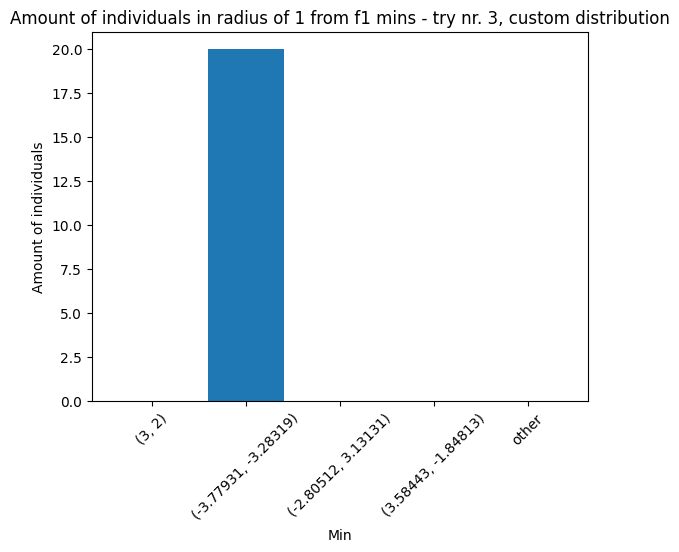

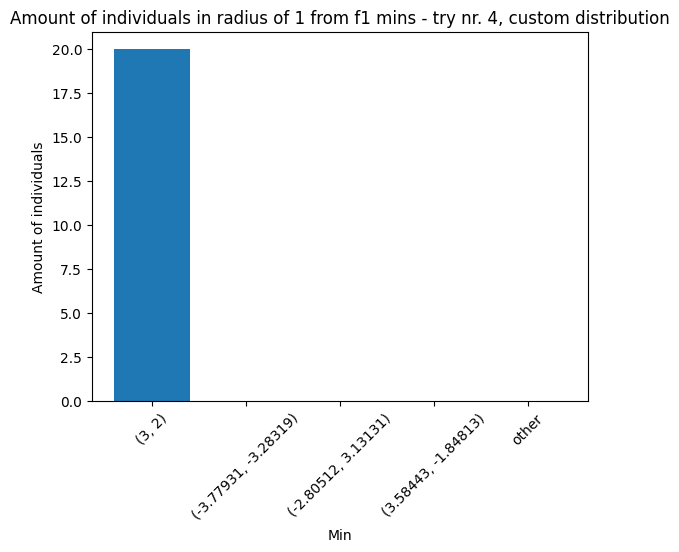

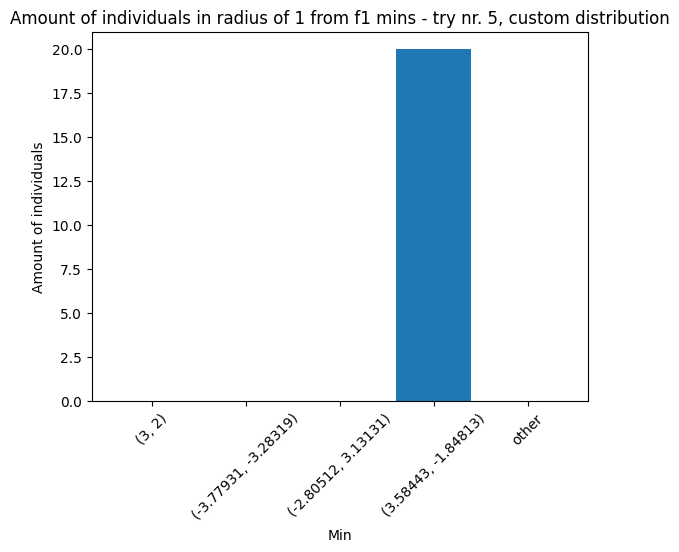

In [152]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]
radius = 1

for number_of_try in range(1, 6):
    starting_population = generate_custom_population(-0.3, -0.9, 0, 0, population_size)
    
    _, population = evolutionary_algorythm(
        starting_population=starting_population,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
    )

    f1_points = [(x1, y1) for x1, y1, _, _ in population]
    
    min_to_individuals = match_points_to_mins(f1_points, f1_mins, radius)
    
    title = f"Amount of individuals in radius of {radius} from f1 mins - try nr. {number_of_try}, custom distribution"
    draw_plot_individuals_amount_to_min(min_to_individuals, title)

Dla obu testowanych początkowych rozkładów populacji, prawie każda końcowa populacja skupia się wokół jednego minimum

Ustaliłem wartośc promienia równą 1. Nie wiem czy jest ona prawidłowa dla prowadzonych badań, ale wydaje się być w porządku

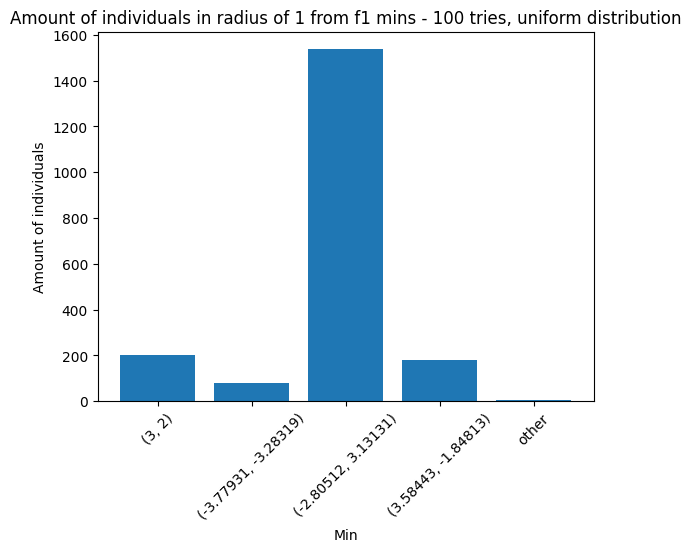

In [153]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]
radius = 1
amount_of_tries = 100

starting_population = np.random.uniform(-5, 5, (population_size, 4))

all_individuals = []

for _ in range(amount_of_tries):
    _, population = evolutionary_algorythm(
        starting_population=starting_population,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
    )
    all_individuals += population

f1_points = [(x1, y1) for x1, y1, _, _ in all_individuals]

min_to_individuals = match_points_to_mins(f1_points, f1_mins, radius)

title = f"Amount of individuals in radius of {radius} from f1 mins - {amount_of_tries} tries, uniform distribution"
draw_plot_individuals_amount_to_min(min_to_individuals, title)

Dla wielu prób na tej samej startowej populacji, większość osobników finalnie znajduje się dookoła jednego z minimów.

Z tego powodu w dalszych badaniach dla każdej z prób losuje nową populację

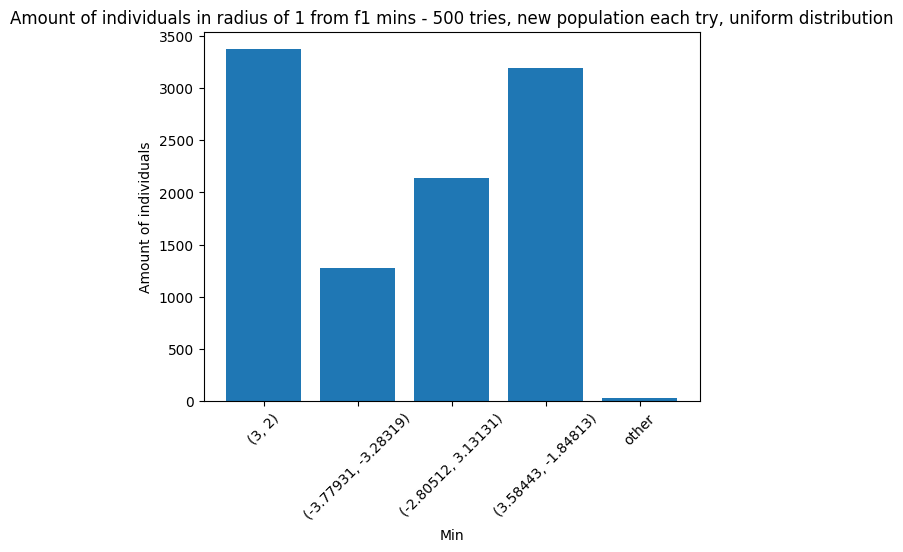

In [156]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]
radius = 1
amount_of_tries = 500

all_individuals = []

for _ in range(amount_of_tries):
    starting_population = np.random.uniform(-5, 5, (population_size, 4))
    
    _, population = evolutionary_algorythm(
        starting_population=starting_population,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
    )
    all_individuals += population

f1_points = [(x1, y1) for x1, y1, _, _ in all_individuals]

min_to_individuals = match_points_to_mins(f1_points, f1_mins, radius)

title = f"Amount of individuals in radius of {radius} from f1 mins - {amount_of_tries} tries, new population each try, uniform distribution"
draw_plot_individuals_amount_to_min(min_to_individuals, title)

Dla losowego porzątkowego rozkładu, co ciekawe, nie znajdujemy każdego minimum z takim samym prawdopodobieństwem

Najczęściej znajdowanym minimum wydaje się być punkt (3, 2), jednakże minimalnie

Założyłem, że 500 prób po 20 osobników jest wystarczające

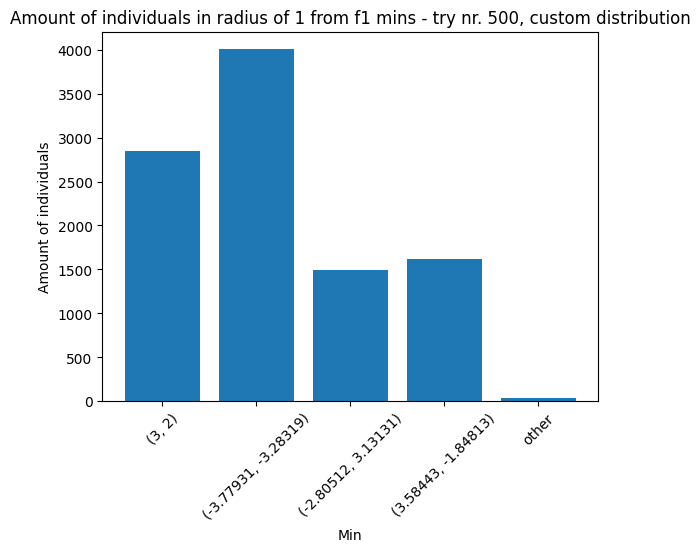

In [157]:
population_size = 20
amount_of_generations = 1000
tournament_size = 2
mutation_probability = 0.1
crossing_probability = 0.8
mutation_range = 0.4

f1_mins = [(3, 2), (-3.77931, -3.28319), (-2.80512, 3.13131), (3.58443, -1.84813)]
radius = 1
amount_of_tries = 500

all_individuals = []

for _ in range(amount_of_tries):
    starting_population = generate_custom_population(-0.3, -0.9, 0, 0, population_size)
    
    _, population = evolutionary_algorythm(
        starting_population=starting_population,
        mutation_probability=mutation_probability,
        crossing_probability=crossing_probability,
        mutation_range=mutation_range,
        amount_of_generations=amount_of_generations,
        tournament_size=tournament_size
    )
    all_individuals += population

f1_points = [(x1, y1) for x1, y1, _, _ in all_individuals]

min_to_individuals = match_points_to_mins(f1_points, f1_mins, radius)

title = f"Amount of individuals in radius of {radius} from f1 mins - try nr. {amount_of_tries}, custom distribution"
draw_plot_individuals_amount_to_min(min_to_individuals, title)

W przypadku rozkładu początkowego zadanego w poleceniu, najczęściej znajdowanym minimum jest punkt (-3.77931, -3.28319)

Różnica w częstotliwości znajdywania go w porównaniu do innych minimów wydaje się być większa niż przy losowym początkowym rozkładzie